** Exploring the Police Killings dataset assembled by the FiveThirtyEight team. **

Description from the DataQuest team: "Due in part to recent high-profile shootings of civilians by police in the US, the media and public have been scrutinizing police killings heavily. If you browse social media and news sites, you may get the sense that there's been a large uptick in civilian shootings by police in the US."

The police killings data represent the year of **2015**.

For more information about the columns and how they gathered the data, refer to the following links: https://github.com/fivethirtyeight/data/tree/master/police-killings

http://fivethirtyeight.com/features/where-police-have-killed-americans-in-2015/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")

police_killings.describe()

C:\Users\bruno\Anaconda3\envs\py27\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,15.830835,2015.0,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0.0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,1.000000,2015.0,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015.0,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,NaN,43804.000000,NaN,NaN,NaN,NaN,NaN
50%,16.000000,2015.0,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,NaN,50856.000000,NaN,NaN,NaN,NaN,NaN
75%,23.000000,2015.0,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,NaN,56832.000000,NaN,NaN,NaN,NaN,NaN
max,31.000000,2015.0,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [4]:
police_killings.head(3)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312


In [5]:
print("# Rows:",police_killings.shape[0])
print("# Columns:",police_killings.shape[1])

('# Rows:', 467)
('# Columns:', 34)


** Killings by reace/ethnicity: **

This is piece of cake with the value_counts() method from pandas library. We just have to call value_counts():

In [6]:
killings_race = police_killings["raceethnicity"].value_counts()

([<matplotlib.axis.XTick at 0x9a35f98>,
 <a list of 6 Text xticklabel objects>)

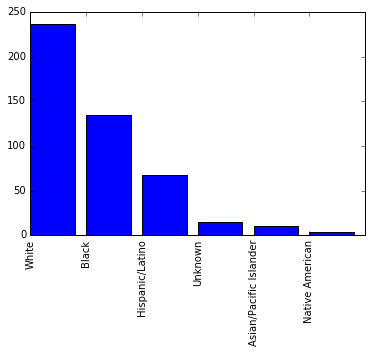

In [7]:
plt.bar(range(6), killings_race)
plt.xticks(range(6), killings_race.index, rotation="vertical")

At first sight, we've come to the conclusion that there's more white Americans killed by the police than any other race-ethny. Indeed, this is a correct conclusion. However, so far we are just looking the absolute numbers. We need to see the proportion of killings in each category over the entire population of each category.

To analyze this issue we need to know the U.S. population racial breakdown. Let's refer to the wikipedia website:
https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States#Racial_and_ethnic_categories

   * White alone: 72.4%
   * Black or African American: 12.6%
   * Asian: 4.8%
   * American Indians and Alaska Natives: 0.9%
   * Native Hawaiians and Other Pacific Islanders: 0.2%
   * Two or more races: 2.9%
   * Some other race: 6.2%

   * Hispanic and Latino Americans (of any race): 16.3%
   
  ** Let's look to three most killed race/ethnicity (White, black, latino) **

In [8]:
killings_proportion = killings_race / sum(killings_race)
killings_proportion * 100

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64

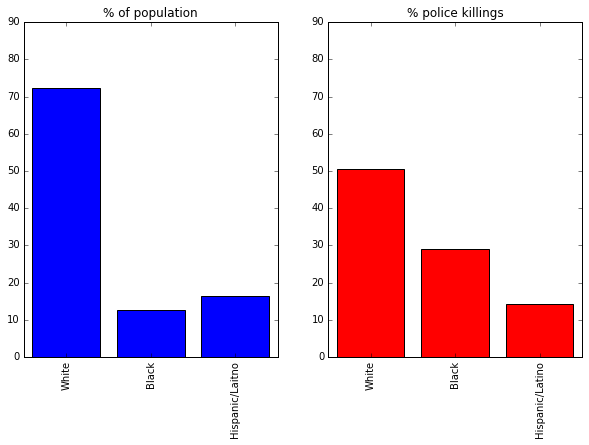

In [9]:
racial_proportion = pd.Series([72.4, 12.6, 16.3],index=['White', 'Black', 'Hispanic/Laitno']) # from wikipedia

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(range(3), racial_proportion, align='center')
ax1.set_title('% of population')
ax1.set_xticks(range(3))
ax1.set_yticks(range(0,100,10))
ax1.set_xticklabels(racial_proportion.index, rotation=90)
#bar1.xticks(range(3), racial_proportion.index, rotation="vertical")

ax2.bar(range(3), killings_proportion[0:3] * 100, color='red', align='center')
ax2.set_title('% police killings')
ax2.set_yticks(range(0,100,10))
ax2.set_xticks(range(3))
ax2.set_xticklabels(killings_proportion[0:3].index, rotation=90)
#bar2.xticks(range(3), killings_proportion[0:3].index, rotation="vertical")

plt.show()

** So, we can clearly note that, in proportion, there are more black people being killed than white people in the U.S. White people represents more than 70% of the population and 50% of the police killings, whereas black people represents arount 10% of the population having 28% of police killings share. **


** In order to improve the visualization, we can plot those bar charts together to provide an easier comprehension. **

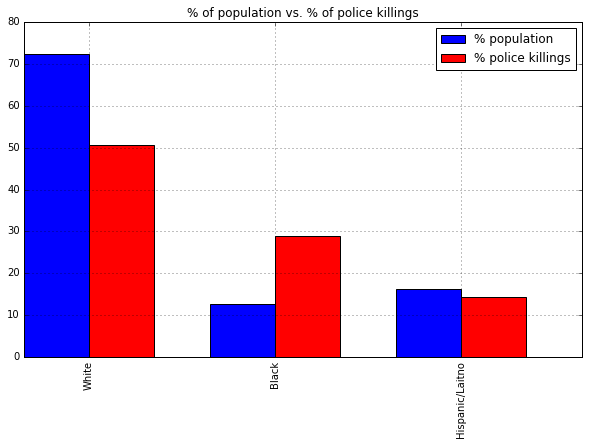

In [10]:
import numpy as np

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

locs = np.arange(0,3)
bar_width = 0.35
offset_locs = locs + bar_width

bar1 = ax.bar(left=locs, height=racial_proportion, width=bar_width)
bar2 = ax.bar(left=offset_locs, height=killings_proportion[0:3]*100, width=bar_width, color='red')
ax.set_title('% of population vs. % of police killings')
ax.set_xticks(offset_locs)
ax.set_xticklabels(racial_proportion.index, rotation=90)

plt.legend((bar1, bar2), ("% population", "% police killings"),loc="upper right")
plt.grid()
plt.show()


** Now we focus the analysis to 'Shootings by Regional Income'. **

The *p_income* column is median personal income by census area. Looking at this will tell us if more of the shootings happened in less affluent areas or more affluent areas.

In [11]:
# Creating a pandas series for the p_income. However, we need to clean (removing the '-' character, which represents N/A entries)
income = police_killings['p_income']

police_killings[police_killings['p_income'] == '-']


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
182,Hashim Abdul-Rasheed,41,Male,Black,January,7,2015,4600 International Gateway,Columbus,OH,...,-,-,NaN,50877,NaN,NaN,NaN,-,NaN,NaN
378,Richard White,63,Male,Black,March,20,2015,Louis Armstrong New Orleans International Airp...,Kenner,LA,...,-,-,NaN,48261,NaN,NaN,NaN,-,NaN,NaN


Rows 182 and 378 represent invalid incomes. So, let's take filter them out, and afterwards convert the income series to float.

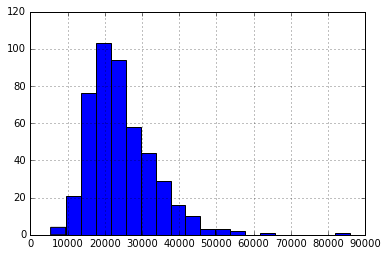

In [12]:
income = police_killings["p_income"][police_killings['p_income'] != '-']

income = income.astype(float)

income.hist(bins=20)

In [13]:
income.median()

22348.0

** As expected, we have a positive skewed distribution. **

This means more people killed with low income, while few people is killed with the highest incomes.

And the meadian income of people killed by the police is $22,348.00, which is below the U.S. average in 2015. 
Shootings tend to happen in less affluent areas



** Income and race/ethnicity are two important socioeconomic factors for influencing in police killings, unfortunately  ** 



---

** Now Let's turn to the police killings distribution over the states**

The following visualization will support us in visually indentifying the states that concentrate more police killings.

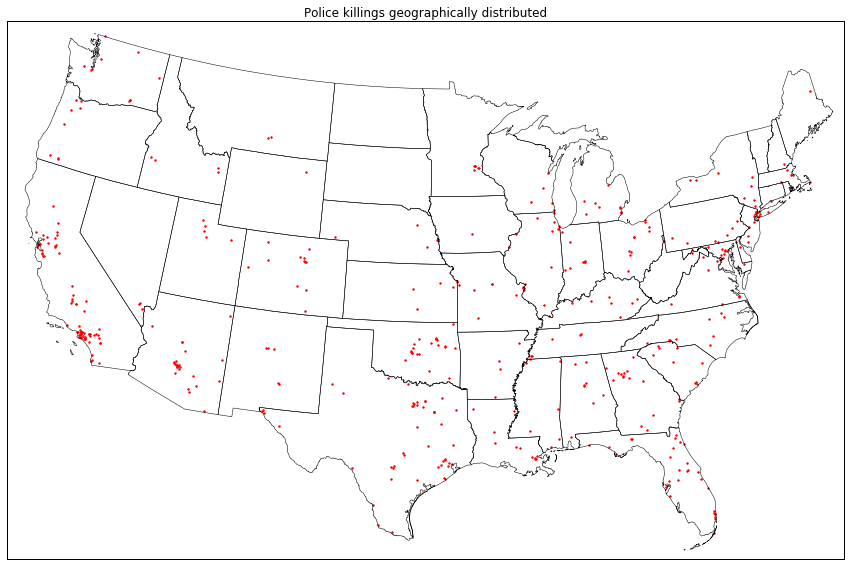

In [21]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(15,20))
axis = fig.add_subplot(1,1,1)
axis.set_title("Police killings geographically distributed")

#m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
m.readshapefile('st99_d00', name='states', drawbounds=True)

longitudes = police_killings["longitude"].tolist()
latitudes = police_killings["latitude"].tolist()

x, y = m(longitudes, latitudes)
m.scatter(x,y, s=2, color='red')
plt.show()

Apparently, California, Arizona, Texas and Florida are the states with more police killings.

Northern states had less police killings in 2015.

We can confirm this observation by listing the police killings by state in descending order.

In [22]:
police_killings["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
WA    11
NJ    11
IL    11
LA    11
OH    10
MD    10
NC    10
MO    10
VA     9
MI     9
SC     9
OR     8
AL     8
IN     8
KY     7
PA     7
TN     6
NE     6
MN     6
MS     6
KS     6
WI     5
MA     5
UT     5
NM     5
AR     4
ID     4
HI     4
NV     3
IA     2
AK     2
WV     2
MT     2
DE     2
DC     1
ME     1
CT     1
WY     1
NH     1
Name: state, dtype: int64